In [1]:
import pandas as pd
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgunsl.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
df = pd.read_csv("data/중극장_요인분석_유형분류_회복력조인.csv").drop(['F0','F1','F2'], axis=1)

In [3]:
df.columns

Index(['공연시설코드', 'GRDP', '지방세징수액', '총인구수', '주차장', '문화시설', '평균연령', '직장인구수',
       '정류장', '검색량합계', '전체면적대비도로면적', '대중교통이용량', '좌석수', '예매/취소금액', '할인금액',
       '장당금액', '평균좌석점유율', '좌석수_합계', '예매/취소금액_합계', '할인금액_합계', '장당금액_합계',
       '예매건수_합계', '평균좌석점유율_합계', '충격반응력', '충격회복력', 'cluster', '감소폭', '감소기간',
       '최저지점이후회복기간', '총기간', 'ratio', 'resilience'],
      dtype='object')

In [4]:
df = df[(df.충격회복력 !=0) & (df.충격회복력 != -100)].reset_index().drop(["index"],axis=1)

In [5]:
df

,공연시설코드,GRDP,지방세징수액,총인구수,주차장,문화시설,평균연령,직장인구수,정류장,검색량합계,...,평균좌석점유율_합계,충격반응력,충격회복력,cluster,감소폭,감소기간,최저지점이후회복기간,총기간,ratio,resilience
0,FC222007,39860038.0,1.399323e+09,3143568.0,0.0,15.0,43.892187,92508.0,10.0,33170.0,...,1127.619400,0.999441,838.051600,1,17867850.0,15,6,21,7.018727,1.624241
1,FC222040,2731839.0,6.324200e+04,236606.0,1.0,2.0,49.491667,33172.0,27.0,52470.0,...,27.216000,0.887045,2.596457,0,3548180.0,12,9,21,1.176063,-0.656679
2,FC222048,25870664.0,4.881770e+05,565264.0,1.0,19.0,48.935484,90358.0,1.0,10943.0,...,5129.018545,0.996858,53.153837,1,31731533.0,2,12,14,4.254676,0.655500
3,FC222054,9503602.0,4.499700e+05,814208.0,0.0,23.0,44.000000,134401.0,30.0,190690.0,...,1137.269000,0.965359,2.864677,0,10366874.0,4,10,14,1.181252,-0.653619
4,FC222061,13519198.0,4.387225e+08,814252.0,6.0,5.0,42.413636,143581.0,20.0,43280.0,...,713.865400,0.928042,1.054113,0,851200.0,3,14,17,0.168433,-1.250739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,FC223835,7671520.0,2.968996e+08,696472.0,8.0,7.0,45.876190,107350.0,20.0,21077.0,...,5230.806792,0.771788,3.490741,0,12459193.0,16,1,17,1.642747,-0.381539
80,FC223889,14019944.0,4.486488e+08,698400.0,6.0,1.0,37.725000,137435.0,8.0,165366.0,...,2544.107467,0.981118,112.850000,0,43647087.0,21,1,22,4.867930,1.519907
81,FC223890,13519198.0,4.387225e+08,814252.0,0.0,26.0,42.413636,143581.0,5.0,43280.0,...,10.731972,0.757177,1.012102,0,979125.0,3,25,28,0.359460,-1.138117
82,FC223897,3160717.0,1.315655e+08,212014.0,0.0,3.0,52.983333,27271.0,9.0,8277.0,...,339.053000,0.790950,5.823907,1,5539113.0,9,5,14,2.278421,-0.037136


# 군집 0

In [34]:
df0 = df[df.cluster == 0]

In [7]:
Y=df0['resilience']

In [8]:
for i in df0.columns[1:8]:
    X=df0[i]
    print(i)
    print(stats.pearsonr(X,Y))
    print(stats.spearmanr(X,Y))
    print(stats.kendalltau(X,Y))


GRDP
PearsonRResult(statistic=0.07739440823098817, pvalue=0.6133293292359149)
SignificanceResult(statistic=0.10321306253579007, pvalue=0.49986883685164785)
SignificanceResult(statistic=0.06103918752987301, pvalue=0.5569676551618405)
지방세징수액
PearsonRResult(statistic=-0.09321526898462247, pvalue=0.5424984613025927)
SignificanceResult(statistic=0.014104467038735042, pvalue=0.9267316963436572)
SignificanceResult(statistic=0.012207837505974602, pvalue=0.9064873771461424)
총인구수
PearsonRResult(statistic=0.07064500303997437, pvalue=0.6446964930150868)
SignificanceResult(statistic=-0.04455429774852752, pvalue=0.7713472234278633)
SignificanceResult(statistic=-0.030519593764936504, pvalue=0.7690056836842285)
주차장
PearsonRResult(statistic=-0.16673571603810922, pvalue=0.27364477358936234)
SignificanceResult(statistic=0.04983625723519583, pvalue=0.7451006275179821)
SignificanceResult(statistic=0.04030114476467833, pvalue=0.7156898216596134)
문화시설
PearsonRResult(statistic=-0.3094189189202567, pvalue=0.03

In [9]:
for i in df0.columns[8:15]:
    X=df0[i]
    print(i)
    print(stats.pearsonr(X,Y))
    print(stats.spearmanr(X,Y))
    print(stats.kendalltau(X,Y))

정류장
PearsonRResult(statistic=-0.053325545676043015, pvalue=0.727915236692392)
SignificanceResult(statistic=-0.15718125785560697, pvalue=0.3024658427574995)
SignificanceResult(statistic=-0.11827107854188881, pvalue=0.2595594871767719)
검색량합계
PearsonRResult(statistic=0.1478031000762021, pvalue=0.33258114206972444)
SignificanceResult(statistic=0.06583630407919042, pvalue=0.6674268715457781)
SignificanceResult(statistic=0.03658604599914625, pvalue=0.7245638833308661)
전체면적대비도로면적
PearsonRResult(statistic=0.12306580317142223, pvalue=0.4205960160282675)
SignificanceResult(statistic=0.1464491857947162, pvalue=0.33707798907124786)
SignificanceResult(statistic=0.101731979216455, pvalue=0.3276199153950131)
대중교통이용량
PearsonRResult(statistic=-0.008297665190841423, pvalue=0.9568579118572977)
SignificanceResult(statistic=0.10110398335242783, pvalue=0.5087166692990113)
SignificanceResult(statistic=0.059004547945543905, pvalue=0.5701890318787779)
좌석수
PearsonRResult(statistic=0.06782136745866506, pvalue=0.

In [14]:
for i in df0.columns[15:22]:
    X=df0[i]
    print(i)
    print(stats.pearsonr(X,Y))
    print(stats.spearmanr(X,Y))
    print(stats.kendalltau(X,Y))

장당금액
PearsonRResult(statistic=-0.04043430661294899, pvalue=0.7919983035912498)
SignificanceResult(statistic=0.0533596837944664, pvalue=0.7277477346874701)
SignificanceResult(statistic=0.028282828282828278, pvalue=0.7841576649247053)
평균좌석점유율
PearsonRResult(statistic=0.18813119423587119, pvalue=0.21586615288521516)
SignificanceResult(statistic=0.2146245059288537, pvalue=0.1568369761609794)
SignificanceResult(statistic=0.13535353535353534, pvalue=0.18991491804514993)
좌석수_합계
PearsonRResult(statistic=0.23306430654552504, pvalue=0.12337714854526274)
SignificanceResult(statistic=0.2051383399209486, pvalue=0.17643512674341527)
SignificanceResult(statistic=0.11919191919191918, pvalue=0.24837156876781552)
예매/취소금액_합계
PearsonRResult(statistic=0.2509917589714229, pvalue=0.09629942184059585)
SignificanceResult(statistic=0.24347826086956517, pvalue=0.10702741131956824)
SignificanceResult(statistic=0.1515151515151515, pvalue=0.14228142215219058)
할인금액_합계
PearsonRResult(statistic=0.08857761450417849, pv

In [15]:
for i in df0.columns[22:23]:
    X=df0[i]
    print(i)
    print(stats.pearsonr(X,Y))
    print(stats.spearmanr(X,Y))
    print(stats.kendalltau(X,Y))


평균좌석점유율_합계
PearsonRResult(statistic=0.2335350968434552, pvalue=0.12259963211954585)
SignificanceResult(statistic=0.2944664031620553, pvalue=0.04958438814326756)
SignificanceResult(statistic=0.18585858585858586, pvalue=0.07186903323934982)


In [21]:
df0.columns

Index(['공연시설코드', 'GRDP', '지방세징수액', '총인구수', '주차장', '문화시설', '평균연령', '직장인구수',
       '정류장', '검색량합계', '전체면적대비도로면적', '대중교통이용량', '좌석수', '예매/취소금액', '할인금액',
       '장당금액', '평균좌석점유율', '좌석수_합계', '예매/취소금액_합계', '할인금액_합계', '장당금액_합계',
       '예매건수_합계', '평균좌석점유율_합계', '충격반응력', '충격회복력', 'cluster', 'resilience'],
      dtype='object')

문화시설,예매/취소금액_합계,예매건수_합계,평균좌석점유율_합계

C:\Users\ohke7\AppData\Local\Temp\ipykernel_15356\1577671377.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0.drop(['공연시설코드','감소폭', '감소기간','최저지점이후회복기간','총기간','평균좌석점유율', 'ratio', '예매/취소금액','장당금액','할인금액','좌석수'], axis=1, inplace=True)
c:\Python310\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\ohke7\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


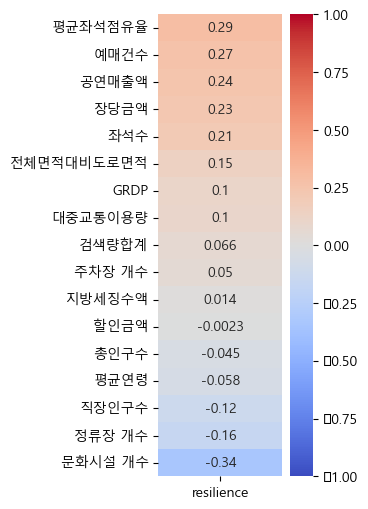

In [51]:

#시각화
df0 = df[df.cluster == 0]
df0.drop(['공연시설코드','감소폭', '감소기간','최저지점이후회복기간','총기간','평균좌석점유율', 'ratio', '예매/취소금액','장당금액','할인금액','좌석수'], axis=1, inplace=True)

# 변수명 변경 - 가독성을 위함
df0.columns = ['GRDP', '지방세징수액', '총인구수', '주차장 개수', '문화시설 개수', '평균연령', '직장인구수',
       '정류장 개수', '검색량합계', '전체면적대비도로면적', '대중교통이용량',
        '좌석수', '공연매출액','할인금액','장당금액','예매건수','평균좌석점유율','충격반응력', '충격회복력', 'cluster', 'resilience']
# 'resili' 변수와 다른 변수들 간의 상관관계 계산
correlation_with_resili = df0.corr(method='spearman')['resilience']

# 히트맵 시각화
plt.figure(figsize=(2, 6))
sns.heatmap(correlation_with_resili.drop(['resilience', 'cluster', '충격반응력', '충격회복력']).sort_values(ascending=False).to_frame(), annot=True, cmap='coolwarm' ,vmin=-1, vmax=1)
# plt.title('군집0 회복탄력성과 변수의 상관관계', fontsize=13)
plt.show()

# 군집 1

In [32]:
df1 = df[df.cluster == 1]

In [17]:
df1.columns

Index(['공연시설코드', 'GRDP', '지방세징수액', '총인구수', '주차장', '문화시설', '평균연령', '직장인구수',
       '정류장', '검색량합계', '전체면적대비도로면적', '대중교통이용량', '좌석수', '예매/취소금액', '할인금액',
       '장당금액', '평균좌석점유율', '좌석수_합계', '예매/취소금액_합계', '할인금액_합계', '장당금액_합계',
       '예매건수_합계', '평균좌석점유율_합계', '충격반응력', '충격회복력', 'cluster', '감소폭', '감소기간',
       '최저지점이후회복기간', '총기간', 'ratio', 'resilience'],
      dtype='object')

In [23]:
Y=df1['resilience']

In [24]:
for i in df1.columns[1:8]:
    X=df1[i]
    print(i)
    print(stats.pearsonr(X,Y))
    print(stats.spearmanr(X,Y))
    print(stats.kendalltau(X,Y))

GRDP
PearsonRResult(statistic=0.2107281366264052, pvalue=0.19785154905389546)
SignificanceResult(statistic=0.1806308016017632, pvalue=0.2711492146336809)
SignificanceResult(statistic=0.1355947472979094, pvalue=0.22616099921205812)
지방세징수액
PearsonRResult(statistic=0.1742648448502485, pvalue=0.28868043696454015)
SignificanceResult(statistic=0.14418063984355986, pvalue=0.381192671400426)
SignificanceResult(statistic=0.09220442816257841, pvalue=0.4105028975578443)
총인구수
PearsonRResult(statistic=0.24694223410541596, pvalue=0.12963051646623816)
SignificanceResult(statistic=0.31083887943801175, pvalue=0.054098789011052736)
SignificanceResult(statistic=0.23864675524432058, pvalue=0.03315998745884777)
주차장
PearsonRResult(statistic=0.037953322231304605, pvalue=0.8185662348834251)
SignificanceResult(statistic=0.10956095129245043, pvalue=0.5067222657790681)
SignificanceResult(statistic=0.0811594989671255, pvalue=0.50156660337264)
문화시설
PearsonRResult(statistic=0.15266779366847744, pvalue=0.35348782557

In [25]:
for i in df1.columns[8:15]:
    X=df1[i]
    print(i)
    print(stats.pearsonr(X,Y))
    print(stats.spearmanr(X,Y))
    print(stats.kendalltau(X,Y))

정류장
PearsonRResult(statistic=-0.21183556165648848, pvalue=0.1954508102124032)
SignificanceResult(statistic=-0.18823620230622218, pvalue=0.25114086995935925)
SignificanceResult(statistic=-0.14931658765212566, pvalue=0.1929792248950204)
검색량합계
PearsonRResult(statistic=0.2022712001512398, pvalue=0.21686858130856315)
SignificanceResult(statistic=0.18780056283629631, pvalue=0.25225952934220636)
SignificanceResult(statistic=0.11645293537966385, pvalue=0.2980093076681444)
전체면적대비도로면적
PearsonRResult(statistic=0.1694376346470966, pvalue=0.3024515115675585)
SignificanceResult(statistic=0.19824837978489482, pvalue=0.22634326797592658)
SignificanceResult(statistic=0.1383066422438676, pvalue=0.21701164111240434)
대중교통이용량
PearsonRResult(statistic=0.18496185122032774, pvalue=0.25963043155210397)
SignificanceResult(statistic=0.3529590663586023, pvalue=0.02752496822669009)
SignificanceResult(statistic=0.2657657047039025, pvalue=0.01768240621872561)
좌석수
PearsonRResult(statistic=-0.1051265097502804, pvalue=

In [26]:
for i in df1.columns[15:22]:
    X=df1[i]
    print(i)
    print(stats.pearsonr(X,Y))
    print(stats.spearmanr(X,Y))
    print(stats.kendalltau(X,Y))

장당금액
PearsonRResult(statistic=0.20416401300505868, pvalue=0.2125065989199714)
SignificanceResult(statistic=0.1653846153846154, pvalue=0.3143320891265859)
SignificanceResult(statistic=0.11470985155195683, pvalue=0.3038396907278911)
평균좌석점유율
PearsonRResult(statistic=-0.2947931738291402, pvalue=0.06848403979831902)
SignificanceResult(statistic=-0.18319838056680163, pvalue=0.2642806784028036)
SignificanceResult(statistic=-0.12010796221322538, pvalue=0.2816493254860488)
좌석수_합계
PearsonRResult(statistic=-0.2131719758655907, pvalue=0.19258101254519733)
SignificanceResult(statistic=-0.1277327935222672, pvalue=0.4383869057353683)
SignificanceResult(statistic=-0.0796221322537112, pvalue=0.4754031324799811)
예매/취소금액_합계
PearsonRResult(statistic=0.021080078098321284, pvalue=0.8986428637314903)
SignificanceResult(statistic=-0.007085020242914981, pvalue=0.9658554968834423)
SignificanceResult(statistic=-0.004048582995951417, pvalue=0.9710506310772951)
할인금액_합계
PearsonRResult(statistic=-0.1459357577724056,

In [27]:
for i in df1.columns[22:23]:
    X=df1[i]
    print(i)
    print(stats.pearsonr(X,Y))
    print(stats.spearmanr(X,Y))
    print(stats.kendalltau(X,Y))


평균좌석점유율_합계
PearsonRResult(statistic=-0.2158063983378702, pvalue=0.1870111194603379)
SignificanceResult(statistic=-0.08724696356275304, pvalue=0.5974029720478503)
SignificanceResult(statistic=-0.06882591093117409, pvalue=0.5372739725204689)


총인구수, 문화시설, 직장인구수, 대중교통이용량

C:\Users\ohke7\AppData\Local\Temp\ipykernel_15356\3973959435.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['공연시설코드','감소폭', '감소기간','최저지점이후회복기간','총기간','평균좌석점유율', 'ratio','예매/취소금액_합계','할인금액','장당금액_합계','좌석수'], axis=1, inplace=True)
c:\Python310\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\ohke7\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


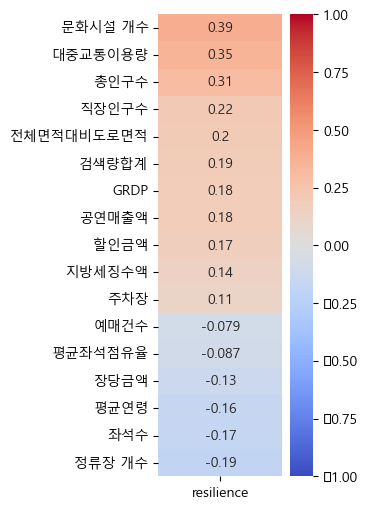

In [50]:

#시각화
df1 = df[df.cluster == 1]
df1.drop(['공연시설코드','감소폭', '감소기간','최저지점이후회복기간','총기간','평균좌석점유율', 'ratio','예매/취소금액_합계','할인금액','장당금액_합계','좌석수'], axis=1, inplace=True)

# 변수명 변경 - 가독성을 위함
df1.columns = ['GRDP', '지방세징수액', '총인구수', '주차장', '문화시설 개수', '평균연령', '직장인구수',
       '정류장 개수', '검색량합계', '전체면적대비도로면적', '대중교통이용량', '공연매출액',
       '할인금액', '장당금액', '좌석수' ,'예매건수','평균좌석점유율','충격반응력', '충격회복력', 'cluster', 'resilience']
# 'resili' 변수와 다른 변수들 간의 상관관계 계산
correlation_with_resili = df1.corr(method='spearman')['resilience']

# 히트맵 시각화
plt.figure(figsize=(2, 6))
sns.heatmap(correlation_with_resili.drop(['resilience', 'cluster', '충격반응력', '충격회복력']).sort_values(ascending=False).to_frame(), annot=True, cmap='coolwarm' ,vmin=-1, vmax=1)
# plt.title('군집0 회복탄력성과 변수의 상관관계', fontsize=13)
plt.show()